# Query 1

# STEP 1: Data Loading (mfccs)

In [1]:
import random
import numpy as np
import torch
import os
import pandas as pd
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import torch as torch
import pandas as pd
from torch import optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import librosa.display

!unzip -o music_genre_data_di.zip

X_train_melgrams = np.load('music_genre_data_di/train/melgrams/X.npy')
y_train_melgrams = np.load('music_genre_data_di/train/melgrams/labels.npy')

X_val_melgrams = np.load('music_genre_data_di/val/melgrams/X.npy')
y_val_melgrams = np.load('music_genre_data_di/val/melgrams/labels.npy')

X_test_melgrams = np.load('music_genre_data_di/test/melgrams/X.npy')
y_test_melgrams = np.load('music_genre_data_di/test/melgrams/labels.npy')

X_train_mfccs = np.load('music_genre_data_di/train/mfccs/X.npy')
y_train_mfccs = np.load('music_genre_data_di/train/mfccs/labels.npy')

X_val_mfccs = np.load('music_genre_data_di/val/mfccs/X.npy')
y_val_mfccs = np.load('music_genre_data_di/val/mfccs/labels.npy')

X_test_mfccs = np.load('music_genre_data_di/test/mfccs/X.npy')
y_test_mfccs = np.load('music_genre_data_di/test/mfccs/labels.npy')

label_encoder = LabelEncoder()

train_melgrams_labels = label_encoder.fit_transform(y_train_melgrams)
val_melgrams_labels = label_encoder.transform(y_val_melgrams)
test_melgrams_labels = label_encoder.transform(y_test_melgrams)

train_mfccs_labels = label_encoder.fit_transform(y_train_mfccs)
val_mfccs_labels = label_encoder.transform(y_val_mfccs)
test_mfccs_labels = label_encoder.transform(y_test_mfccs)

BATCH_SIZE = 16

train_dataset_mfcss = TensorDataset(torch.tensor(X_train_mfccs, dtype=torch.float32), torch.tensor(train_mfccs_labels, dtype=torch.long))
val_dataset_mfcss = TensorDataset(torch.tensor(X_val_mfccs, dtype=torch.float32), torch.tensor(val_mfccs_labels, dtype=torch.long))
test_dataset_mfcss = TensorDataset(torch.tensor(X_test_mfccs, dtype=torch.float32), torch.tensor(test_mfccs_labels, dtype=torch.long))

train_loader_mfcss = DataLoader(train_dataset_mfcss, batch_size=BATCH_SIZE, shuffle=True)
val_loader_mfcss = DataLoader(val_dataset_mfcss, batch_size=BATCH_SIZE, shuffle=True)
test_loader_mfcss = DataLoader(test_dataset_mfcss, batch_size=BATCH_SIZE, shuffle=False)

print(f"Labels: {label_encoder.classes_}")

Archive:  music_genre_data_di.zip
  inflating: music_genre_data_di/test/melgrams/labels.npy  
  inflating: music_genre_data_di/test/melgrams/X.npy  
  inflating: music_genre_data_di/test/mfccs/labels.npy  
  inflating: music_genre_data_di/test/mfccs/X.npy  
  inflating: music_genre_data_di/train/melgrams/labels.npy  
  inflating: music_genre_data_di/train/melgrams/X.npy  
  inflating: music_genre_data_di/train/mfccs/labels.npy  
  inflating: music_genre_data_di/train/mfccs/X.npy  
  inflating: music_genre_data_di/val/melgrams/labels.npy  
  inflating: music_genre_data_di/val/melgrams/X.npy  
  inflating: music_genre_data_di/val/mfccs/labels.npy  
  inflating: music_genre_data_di/val/mfccs/X.npy  
Labels: ['blues' 'classical' 'hiphop' 'rock_metal_hardrock']


In [2]:
# Preview the first batch of MFCCs data and labels from the training set using the data loader
data_iter = iter(train_loader_mfcss)
mfccs_batch, labels_batch = next(data_iter)

mfccs_batch = mfccs_batch.numpy()
labels_batch = labels_batch.numpy()

for i in range(5):
    print(f"Sample {i + 1} - MFCCs:\n{mfccs_batch[i]}\nLabel: {labels_batch[i]}")


Sample 1 - MFCCs:
[-2.00571480e+01  1.14845967e+00  1.63008675e-01  1.37694076e-01
  1.88128635e-01  3.74476731e-01  4.14388590e-02 -4.02111793e-03
 -1.40163481e-01 -9.97298136e-02 -2.84972936e-01  2.07955137e-01
  7.63480663e-02  2.88492024e-01  1.88307568e-01  1.83999613e-01
  1.71379402e-01  1.52930766e-01  2.94320583e-01  2.35651895e-01
  1.58832505e-01  2.00819522e-01  1.80156574e-01  1.01926975e-01
  1.69139713e-01  1.75065205e-01]
Label: 3
Sample 2 - MFCCs:
[-2.1455748e+01  1.3518907e+00 -1.8830597e-01  6.3494790e-01
  5.9023663e-02 -4.6485245e-01 -1.9929364e-01  1.6416946e-01
 -2.6687047e-01  2.8228839e-03  2.9179800e-01 -1.5691857e-01
 -2.2347954e-01  7.9653865e-01  4.5895812e-01  4.7369137e-01
  2.0781736e-01  2.0862083e-01  2.6906487e-01  2.3442554e-01
  2.5946116e-01  2.2056428e-01  1.6505070e-01  2.3479937e-01
  1.8292448e-01  2.4815394e-01]
Label: 0
Sample 3 - MFCCs:
[-23.099052     2.2080278    0.5796435    0.07870232  -0.23385742
   0.29434007  -0.04499927  -0.06031458 

Sample 1 - MFCCs: \
[-2.2553576e+01  2.7285593e+00  2.5918977e-02  1.1022884e-01 \
 -3.1578171e-01 -2.5006631e-02  1.5556138e-02  1.7535387e-02 \
  3.7025798e-02  1.5487538e-01 -2.2948222e-01  5.0243538e-02 \
 -1.9217800e-01  1.0216693e+00  5.4664624e-01  4.9118587e-01 \
  4.8797745e-01  3.1588015e-01  3.1959847e-01  2.6229122e-01 \
  2.3018837e-01  2.4441515e-01  2.9878369e-01  2.6426667e-01 \
  1.9473237e-01  2.8674385e-01] \
Label: 3\
The vector contains 26 values. The first 13 values represent the mean of each MFCC coefficient across the 20 time frames, and the last 13 values represent the standard deviation of each MFCC coefficient across the same time frames.

# STEP 2: Neural Network Initialization

In [3]:
class MusicGenreCLF(nn.Module):
    def __init__(self):
        super(MusicGenreCLF, self).__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(26, 128),
            nn.Linear(128, 32),
            nn.Linear(32, 4)
        )

    def forward(self, x):
        x = self.fc_layers(x)
        return x

# STEP 3: Training Process


In [4]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.train()
    size = len(dataloader.dataset)
    total_loss = 0.0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / size


# STEP 4: Evaluation Process

In [5]:
def test_loop(dataloader, model, loss_fn, device):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.eval()
    preds = []
    labels = []
    total_loss = 0.0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            loss = loss_fn(pred, y)
            total_loss += loss.item()

            _, pred = torch.max(pred, 1)
            preds.extend(pred.tolist())
            labels.extend(y.tolist())

    avg_loss = total_loss / len(dataloader)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    cm = confusion_matrix(labels, preds)

    return avg_loss, acc, f1, cm

    from sklearn.metrics import classification_report

def evaluate(dataloader, model, loss_fn, device):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.eval()
    size = len(dataloader.dataset)
    test_loss = 0.0
    correct = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            all_preds.extend(pred.argmax(1).cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# STEP 5: Train and Evaluation of the model

In [6]:
model = MusicGenreCLF()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=2e-2)
EPOCHS = 30

print('Training')
for epoch in range(EPOCHS):
    train_loss = train_loop(train_loader_mfcss, model, loss_fn, optimizer, device=False)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss}')
    valid_loss, valid_acc, valid_f1, valid_cm = test_loop(val_loader_mfcss, model, loss_fn, device=False)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Val Loss: {valid_loss}, Val F1: {valid_f1}, Val Accuracy: {valid_acc}')

print('Testing')
evaluate(test_loader_mfcss, model, loss_fn, device=False)


Training
Epoch [1/30], Train Loss: 0.08653075013309718
Epoch [1/30], Val Loss: 1.2688173985481261, Val F1: 0.583871410414616, Val Accuracy: 0.58
Epoch [2/30], Train Loss: 0.07914209309965373
Epoch [2/30], Val Loss: 1.1521188855171203, Val F1: 0.5694176671664362, Val Accuracy: 0.6
Epoch [3/30], Train Loss: 0.07358855783939361
Epoch [3/30], Val Loss: 1.034891300201416, Val F1: 0.6071146297814211, Val Accuracy: 0.6225
Epoch [4/30], Train Loss: 0.07086151972413063
Epoch [4/30], Val Loss: 0.9805024111270905, Val F1: 0.632621953731645, Val Accuracy: 0.6525
Epoch [5/30], Train Loss: 0.06837102390825749
Epoch [5/30], Val Loss: 0.9606882119178772, Val F1: 0.6011278196377474, Val Accuracy: 0.6275
Epoch [6/30], Train Loss: 0.06880351897329091
Epoch [6/30], Val Loss: 1.0504537308216095, Val F1: 0.5323326920081485, Val Accuracy: 0.55125
Epoch [7/30], Train Loss: 0.06587118532508612
Epoch [7/30], Val Loss: 0.9236010694503785, Val F1: 0.6314577736497133, Val Accuracy: 0.64375
Epoch [8/30], Train Loss

# STEP 6: Train and Evaluation with GPU

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MusicGenreCLF().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=2e-2)

print('Training')
for epoch in range(EPOCHS):
    train_loss = train_loop(train_loader_mfcss, model, loss_fn, optimizer, device=True)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {train_loss}')
    valid_loss, valid_acc, valid_f1, valid_cm = test_loop(val_loader_mfcss, model, loss_fn, device=True)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Val Loss: {valid_loss}, Val F1: {valid_f1}, Val Accuracy: {valid_acc}')

print('Testing')
evaluate(test_loader_mfcss, model, loss_fn, device=True)

Training
Epoch [1/30], Loss: 0.0867767545953393
Epoch [1/30], Val Loss: 1.3257431721687316, Val F1: 0.10515089585110815, Val Accuracy: 0.2525
Epoch [2/30], Loss: 0.07929713539779186
Epoch [2/30], Val Loss: 1.1534794974327087, Val F1: 0.6598675299363415, Val Accuracy: 0.65875
Epoch [3/30], Loss: 0.07485647335648536
Epoch [3/30], Val Loss: 1.4917879009246826, Val F1: 0.15392092017964487, Val Accuracy: 0.2775
Epoch [4/30], Loss: 0.07152380371466278
Epoch [4/30], Val Loss: 1.00699911236763, Val F1: 0.6692632042647881, Val Accuracy: 0.6725
Epoch [5/30], Loss: 0.06839509885758162
Epoch [5/30], Val Loss: 1.0884050559997558, Val F1: 0.46534193126904083, Val Accuracy: 0.495
Epoch [6/30], Loss: 0.06780358403921127
Epoch [6/30], Val Loss: 1.1614686524868012, Val F1: 0.39226013338976806, Val Accuracy: 0.455
Epoch [7/30], Loss: 0.0651465354114771
Epoch [7/30], Val Loss: 0.9767311418056488, Val F1: 0.5122695422045227, Val Accuracy: 0.54625
Epoch [8/30], Loss: 0.065479003097862
Epoch [8/30], Val Loss

# STEP 7: Save best model

In [8]:
model = MusicGenreCLF().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=2e-2)

best_f1 = 0
best_model = None

print('Training')
for epoch in range(EPOCHS):
    total_loss = train_loop(train_loader_mfcss, model, criterion, optimizer, device=True)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {total_loss}')

    val_loss, val_acc, val_f1, val_cm = test_loop(val_loader_mfcss, model, criterion, device=True)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Val Loss: {val_loss}, Val F1: {val_f1}, Val Accuracy: {val_acc}')

    if val_f1 > best_f1:
        best_f1 = val_f1
        best_model = model.state_dict()
        print(f'Best model with F1: {best_f1} saved at epoch {epoch+1}')
        torch.save(best_model, 'best_model.pth')

model.load_state_dict(best_model)

print('Testing')
evaluate(test_loader_mfcss, model, criterion, device=True)

Training
Epoch [1/30], Loss: 0.08809608481824398
Epoch [1/30], Val Loss: 1.3079444193840026, Val F1: 0.1746561094662441, Val Accuracy: 0.28375
Best model with F1: 0.1746561094662441 saved at epoch 1
Epoch [2/30], Loss: 0.07983489764854312
Epoch [2/30], Val Loss: 1.163486659526825, Val F1: 0.5449282938564026, Val Accuracy: 0.6
Best model with F1: 0.5449282938564026 saved at epoch 2
Epoch [3/30], Loss: 0.07473854010924696
Epoch [3/30], Val Loss: 1.2456339287757874, Val F1: 0.3068937286697836, Val Accuracy: 0.42
Epoch [4/30], Loss: 0.07259864827618003
Epoch [4/30], Val Loss: 1.0282171392440795, Val F1: 0.56879868928409, Val Accuracy: 0.60375
Best model with F1: 0.56879868928409 saved at epoch 4
Epoch [5/30], Loss: 0.07047148266807199
Epoch [5/30], Val Loss: 1.2765296697616577, Val F1: 0.2981325788480326, Val Accuracy: 0.4025
Epoch [6/30], Loss: 0.06820834152400494
Epoch [6/30], Val Loss: 0.9939402735233307, Val F1: 0.5523432737960017, Val Accuracy: 0.57
Epoch [7/30], Loss: 0.0664465550519

### Using a GPU does not impact the improvement in predictions of any model. But choosing the best model through validation on the validation dataset shows better performance for some classes like, but not optimal for all. Its obvious that this method helped in choosing a model that generalizes better, but there's definitely room for improvement, for instance getting a larger dataset or even tweaking the architecture of the NN.

# Query 2

# STEP 1: Data Loading (mfccs)

In [9]:
X_train_melgrams = np.load('music_genre_data_di/train/melgrams/X.npy')
y_train_melgrams = np.load('music_genre_data_di/train/melgrams/labels.npy')

X_val_melgrams = np.load('music_genre_data_di/val/melgrams/X.npy')
y_val_melgrams = np.load('music_genre_data_di/val/melgrams/labels.npy')

X_test_melgrams = np.load('music_genre_data_di/test/melgrams/X.npy')
y_test_melgrams = np.load('music_genre_data_di/test/melgrams/labels.npy')

label_encoder = LabelEncoder()

train_melgrams_labels = label_encoder.fit_transform(y_train_melgrams)
val_melgrams_labels = label_encoder.transform(y_val_melgrams)
test_melgrams_labels = label_encoder.transform(y_test_melgrams)

train_melgrams_labels = label_encoder.fit_transform(y_train_melgrams)
val_melgrams_labels = label_encoder.transform(y_val_melgrams)
test_melgrams_labels = label_encoder.transform(y_test_melgrams)

BATCH_SIZE = 16
LR = 1e-3

train_dataset_melgrams = TensorDataset(torch.tensor(X_train_melgrams, dtype=torch.float32), torch.tensor(train_melgrams_labels, dtype=torch.long))
val_dataset_melgrams = TensorDataset(torch.tensor(X_val_melgrams, dtype=torch.float32), torch.tensor(val_melgrams_labels, dtype=torch.long))
test_dataset_melgrams = TensorDataset(torch.tensor(X_test_melgrams, dtype=torch.float32), torch.tensor(test_melgrams_labels, dtype=torch.long))

train_loader_melgrams = DataLoader(train_dataset_melgrams, batch_size=BATCH_SIZE, shuffle=True)
val_loader_melgrams = DataLoader(val_dataset_melgrams, batch_size=BATCH_SIZE, shuffle=True)
test_loader_melgrams = DataLoader(test_dataset_melgrams, batch_size=BATCH_SIZE, shuffle=False)


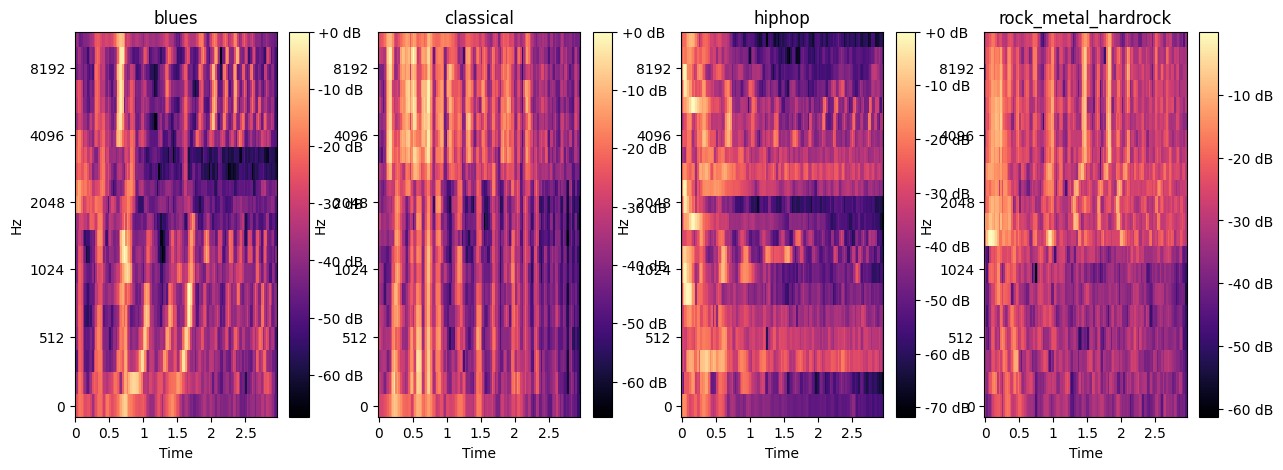

In [10]:
def visualize_random_samples(X, y, label_encoder):
    classes = np.unique(y)
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
    for i, cls in enumerate(classes):
        idx = np.random.choice(np.where(y == cls)[0])
        mel_spectrogram = X[idx].squeeze()
        ax = axes[i]
        img = librosa.display.specshow(mel_spectrogram, sr=22050, x_axis='time', y_axis='mel', ax=ax)
        ax.set_title(label_encoder.inverse_transform([cls])[0])
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
    plt.show()

visualize_random_samples(X_train_melgrams, train_melgrams_labels, label_encoder)

source: https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

Bright yellow areas (0 dB) indicate loud sounds and darker areas represent quieter sounds

In [11]:
import torch.nn as nn

class MusicGenreCNN(nn.Module):
    def __init__(self, out_dim):
        super(MusicGenreCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5),
            nn.Conv2d(16, 32, kernel_size=5),
            nn.Conv2d(32, 64, kernel_size=5),
            nn.Conv2d(64, 128, kernel_size=5),
        )

        self._to_linear = None
        self.calculate_linear_output((1, 21, 128))
        print(f'Linear output: {self._to_linear}')
        self.fc_layers = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.Linear(1024, 256),
            nn.Linear(256, 32),
            nn.Linear(32, out_dim)
        )

    def calculate_linear_output(self, shape):
        # output = torch.ones(1, *shape)
        # print(f'Input shape: {output.shape}')
        # output = self.conv1(output)
        # print(f'Conv1 shape: {output.shape}')
        # output = self.conv2(output)
        # print(f'Conv2 shape: {output.shape}')
        # output = self.conv3(output)
        # print(f'Conv3 shape: {output.shape}')
        # output = self.conv4(output)
        # print(f'Conv4 shape: {output.shape}')
        # self._to_linear = output.numel()
        output = torch.ones(1, *shape)
        print(f'Input shape: {output.shape}')
        output = self.conv_layers(output)
        print(f'Conv shape: {output.shape}')
        self._to_linear = output.numel()

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = self.fc_layers(x)
        return x

num_classes = len(label_encoder.classes_)
print(f'Number of classes: {num_classes}')
print(f"Class names {label_encoder.classes_}")

model = MusicGenreCNN(num_classes)

random_index = np.random.randint(len(train_dataset_melgrams))
random_sample, random_label = train_dataset_melgrams[random_index]
print(f'Random sample shape: {random_sample.shape}')
random_sample = random_sample.unsqueeze(0).unsqueeze(0) # adding batch and channel dimension

output = model(random_sample)


print(f'Random sample shape: {random_sample.shape}')
print(f'Output shape: {output.shape}')


Number of classes: 4
Class names ['blues' 'classical' 'hiphop' 'rock_metal_hardrock']
Input shape: torch.Size([1, 1, 21, 128])
Conv shape: torch.Size([1, 128, 5, 112])
Linear output: 71680
Random sample shape: torch.Size([21, 128])
Random sample shape: torch.Size([1, 1, 21, 128])
Output shape: torch.Size([1, 4])


Every input sample has a shape of (21, 128) and the dim of the output tensor remain the same for any sample taken:\
Random sample shape: torch.Size([1, 1, 21, 128])\
1 sample, 1 channel, 21 time steps, 128 frequency bins\
Convolutional layers expect 4 dimensions: (batch_size, num_of_channels, input_height, input_width):\
Random sample shape: torch.Size([21, 128]) ->
Random sample shape: torch.Size([1, 1, 21, 128])\
Conv1 shape: torch.Size([1, 16, 17, 124])\
Conv2 shape: torch.Size([1, 32, 13, 120])\
Conv3 shape: torch.Size([1, 64, 9, 116])\
Conv4 shape: torch.Size([1, 128, 5, 112])\
Linear output: 71680 <-- Flattened size of the tensor with torch.numel(input) that returns the total number of elements in the input tensor (https://pytorch.org/docs/stable/generated/torch.numel.html)\
Initializing a tensor with ones and multiplied by the tuple (1, 21, 128) (https://pytorch.org/docs/stable/generated/torch.ones.html)


# Step 3: Training the CNN

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.train()
    size = len(dataloader.dataset)
    loss_total = 0.0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X.unsqueeze(1))  # Add channel dimension
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_total += loss.item()
        if batch % 100 == 0:
            current = batch * len(X)
            print(f"loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]")

    return loss_total / len(dataloader)

def test_loop(dataloader, model, loss_fn, device):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.eval()
    test_loss = 0.0
    correct = 0
    size = len(dataloader.dataset)

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X.unsqueeze(1))  # Add channel dimension
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return 100 * correct, test_loss

def evaluate(dataloader, model, loss_fn, device, return_dict=False):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.eval()
    size = len(dataloader.dataset)
    test_loss = 0.0
    correct = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X.unsqueeze(1))  # Add channel dimension
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            all_preds.extend(pred.argmax(1).cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_, output_dict=return_dict)

    print(report)

    return report

### MusicGenreCNN

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
EPOCHS = 10

for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loop(train_loader_melgrams, model, loss_fn, optimizer, device=True)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss}')
    test_loop(val_loader_melgrams, model, loss_fn, device=True)

print('Testing')
report = evaluate(test_loader_melgrams, model, loss_fn, device=True)

Epoch 1
-------------------------------
loss: 1.452244  [    0/ 3200]
loss: 1.398024  [ 1600/ 3200]
Epoch [1/10], Train Loss: 97.15910612523555
Test Error: 
 Accuracy: 55.6%, Avg loss: 0.066003 

Epoch 2
-------------------------------
loss: 0.864174  [    0/ 3200]
loss: 0.655541  [ 1600/ 3200]
Epoch [2/10], Train Loss: 0.9157060903310775
Test Error: 
 Accuracy: 60.5%, Avg loss: 0.061372 

Epoch 3
-------------------------------
loss: 0.561251  [    0/ 3200]
loss: 0.915399  [ 1600/ 3200]
Epoch [3/10], Train Loss: 0.7759707625210285
Test Error: 
 Accuracy: 58.9%, Avg loss: 0.064568 

Epoch 4
-------------------------------
loss: 0.722734  [    0/ 3200]
loss: 0.743092  [ 1600/ 3200]
Epoch [4/10], Train Loss: 0.6675746458023787
Test Error: 
 Accuracy: 60.8%, Avg loss: 0.063670 

Epoch 5
-------------------------------
loss: 0.477370  [    0/ 3200]
loss: 0.454248  [ 1600/ 3200]
Epoch [5/10], Train Loss: 0.5985027017444372
Test Error: 
 Accuracy: 59.6%, Avg loss: 0.068972 

Epoch 6
--------

without pred = model(X.unsqueeze(1)) to add channel dimension we get: Given groups=1, weight of size [16, 1, 5, 5], expected input[1, 16, 21, 128] to have 1 channels, but got 16 channels instead\
self.conv1 = nn.Conv2d(1, 16, kernel_size=5) expects the input to have 1 channel.

It's obvious that CPU times are going to be significantly higher than with GPU. The convolutional operations involve sliding a filter over the input data and performing element-wise multiplications and summations. A rather interesting GIF can be seen here https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide.\
These kind of operations benefit immensely from the power of GPUs over CPUs.

# Step 4: Pooling and Padding

In [14]:
class MusicGenreCNN_Pooling(nn.Module):
    def __init__(self, out_dim):
        super(MusicGenreCNN_Pooling, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.MaxPool2d(2,2)
        )

        self._to_linear = None
        self.calculate_linear_output((1, 21, 128))
        print(f'Linear output: {self._to_linear}')

        self.fc_layers = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.Linear(1024, 256),
            nn.Linear(256, 32),
            nn.Linear(32, out_dim)
        )

    def calculate_linear_output(self, shape):
        output = torch.ones(1, *shape)
        print(f'Input shape: {output.shape}')
        output = self.conv_layers(output)
        print(f'Conv shape: {output.shape}')
        self._to_linear = output.numel()


    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = self.fc_layers(x)
        return x

num_classes = len(label_encoder.classes_)
print(f'Number of classes: {num_classes}')
print(f"Class names {label_encoder.classes_}")

model_pooling = MusicGenreCNN_Pooling(num_classes)


Number of classes: 4
Class names ['blues' 'classical' 'hiphop' 'rock_metal_hardrock']
Input shape: torch.Size([1, 1, 21, 128])
Conv shape: torch.Size([1, 128, 1, 8])
Linear output: 1024


### MusicGenreCNN_Pooling

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pooling.parameters(), lr=LR)

for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loop(train_loader_melgrams, model_pooling, loss_fn, optimizer, device=True)
    print(f'Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss}')
    test_loop(val_loader_melgrams, model_pooling, loss_fn, device=True)

print('Testing')
report = evaluate(test_loader_melgrams, model_pooling, loss_fn, device=True)

Epoch 1
-------------------------------
loss: 1.381302  [    0/ 3200]
loss: 0.910024  [ 1600/ 3200]
Epoch [1/10], Train Loss: 1.1813547861576081
Test Error: 
 Accuracy: 65.9%, Avg loss: 0.048572 

Epoch 2
-------------------------------
loss: 0.715927  [    0/ 3200]
loss: 0.909853  [ 1600/ 3200]
Epoch [2/10], Train Loss: 0.7561468249559402
Test Error: 
 Accuracy: 73.8%, Avg loss: 0.041802 

Epoch 3
-------------------------------
loss: 0.751981  [    0/ 3200]
loss: 0.984743  [ 1600/ 3200]
Epoch [3/10], Train Loss: 0.6859725250303745
Test Error: 
 Accuracy: 70.6%, Avg loss: 0.048376 

Epoch 4
-------------------------------
loss: 0.285476  [    0/ 3200]
loss: 0.465281  [ 1600/ 3200]
Epoch [4/10], Train Loss: 0.5657710131630301
Test Error: 
 Accuracy: 66.5%, Avg loss: 0.060168 

Epoch 5
-------------------------------
loss: 0.309189  [    0/ 3200]
loss: 0.311374  [ 1600/ 3200]
Epoch [5/10], Train Loss: 0.4375979743339121
Test Error: 
 Accuracy: 71.2%, Avg loss: 0.052718 

Epoch 6
-------

# Step 5: Different Optimizers

In [16]:
def train_and_evaluate(train_loader, val_loader, test_loader, model_class, loss_fn, optimizers, num_classes, num_epochs=10, lr=1e-3):
    results = {'Optimizer': [], 'Accuracy': [], 'F1 Score': []}

    for opt_name in optimizers:
        print(f"Training with {opt_name} optimizer...")
        model = model_class(num_classes)
        optimizer = getattr(optim, opt_name)(model.parameters(), lr=lr)

        for t in range(num_epochs):
            print(f"Epoch {t+1} with {opt_name}\n-------------------------------")
            train_loop(train_loader, model, loss_fn, optimizer, device=True)
            test_loop(val_loader, model, loss_fn, device=True)

        report = evaluate(test_loader, model, loss_fn, device=True, return_dict=True)
        results['Optimizer'].append(opt_name)
        results['Accuracy'].append(report['accuracy'])
        results['F1 Score'].append(report['weighted avg']['f1-score'])

    return results

optimizers = ['SGD', 'Adam', 'RMSprop']
results = train_and_evaluate(train_loader_melgrams, val_loader_melgrams, test_loader_melgrams, MusicGenreCNN_Pooling, loss_fn, optimizers, num_classes)

results_df = pd.DataFrame(results)

print(results_df.transpose())

Training with SGD optimizer...
Input shape: torch.Size([1, 1, 21, 128])
Conv shape: torch.Size([1, 128, 1, 8])
Linear output: 1024
Epoch 1 with SGD
-------------------------------
loss: 1.299085  [    0/ 3200]
loss: 1.306386  [ 1600/ 3200]
Test Error: 
 Accuracy: 33.9%, Avg loss: 0.079004 

Epoch 2 with SGD
-------------------------------
loss: 1.129960  [    0/ 3200]
loss: 0.967626  [ 1600/ 3200]
Test Error: 
 Accuracy: 50.6%, Avg loss: 0.070424 

Epoch 3 with SGD
-------------------------------
loss: 1.164847  [    0/ 3200]
loss: 1.037361  [ 1600/ 3200]
Test Error: 
 Accuracy: 54.2%, Avg loss: 0.064419 

Epoch 4 with SGD
-------------------------------
loss: 1.045949  [    0/ 3200]
loss: 0.838448  [ 1600/ 3200]
Test Error: 
 Accuracy: 44.6%, Avg loss: 0.065856 

Epoch 5 with SGD
-------------------------------
loss: 0.973250  [    0/ 3200]
loss: 0.908278  [ 1600/ 3200]
Test Error: 
 Accuracy: 64.5%, Avg loss: 0.056226 

Epoch 6 with SGD
-------------------------------
loss: 0.714486 

# Query 3

In [17]:
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed()

manual_seed generates random numbers on all devices (cpu and gpu) https://pytorch.org/docs/stable/generated/torch.manual_seed.html\
torch.backends.cudnn.benchmark = False https://pytorch.org/docs/stable/notes/randomness.html#avoiding-nondeterministic-algorithms Traditionally, the benchmark may select different algorithms on subsequent runs. By disabling this feature we cause cuDNN to deterministically select the same algorithm.\
torch.backends.cudnn.deterministic = True https://pytorch.org/docs/stable/notes/randomness.html#cuda-convolution-determinism Sets the same algorithm each time to be a deterministic one\


In [18]:
X_train_melgrams = np.load('music_genre_data_di/train/melgrams/X.npy')
y_train_melgrams = np.load('music_genre_data_di/train/melgrams/labels.npy')

X_val_melgrams = np.load('music_genre_data_di/val/melgrams/X.npy')
y_val_melgrams = np.load('music_genre_data_di/val/melgrams/labels.npy')

X_test_melgrams = np.load('music_genre_data_di/test/melgrams/X.npy')
y_test_melgrams = np.load('music_genre_data_di/test/melgrams/labels.npy')

label_encoder = LabelEncoder()

train_melgrams_labels = label_encoder.fit_transform(y_train_melgrams)
val_melgrams_labels = label_encoder.transform(y_val_melgrams)
test_melgrams_labels = label_encoder.transform(y_test_melgrams)

BATCH_SIZE = 16
LR = 1e-3

train_dataset_melgrams = TensorDataset(torch.tensor(X_train_melgrams, dtype=torch.float32), torch.tensor(train_melgrams_labels, dtype=torch.long))
val_dataset_melgrams = TensorDataset(torch.tensor(X_val_melgrams, dtype=torch.float32), torch.tensor(val_melgrams_labels, dtype=torch.long))
test_dataset_melgrams = TensorDataset(torch.tensor(X_test_melgrams, dtype=torch.float32), torch.tensor(test_melgrams_labels, dtype=torch.long))

train_loader_melgrams = DataLoader(train_dataset_melgrams, batch_size=BATCH_SIZE, shuffle=True)
val_loader_melgrams = DataLoader(val_dataset_melgrams, batch_size=BATCH_SIZE, shuffle=True)
test_loader_melgrams = DataLoader(test_dataset_melgrams, batch_size=BATCH_SIZE, shuffle=False)


In [19]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.train()
    size = len(dataloader.dataset)
    loss_total = 0.0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X.unsqueeze(1))  # Add channel dimension
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_total += loss.item()
        if batch % 100 == 0:
            current = batch * len(X)
            print(f"loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]")

    return loss_total / len(dataloader)

def test_loop(dataloader, model, loss_fn, device):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.eval()
    total_loss = 0.0
    preds = []
    labels = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X.unsqueeze(1))  # Add channel dimension if needed
            loss = loss_fn(pred, y)
            total_loss += loss.item()

            _, pred = torch.max(pred, 1)
            preds.extend(pred.cpu().tolist())
            labels.extend(y.cpu().tolist())

    avg_loss = total_loss / len(dataloader)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted', zero_division=0)
    cm = confusion_matrix(labels, preds)

    print(f"Test Error: \n Accuracy: {acc:.2f}%, Avg loss: {avg_loss:.4f}, F1 Score: {f1:.4f} \n")

    return avg_loss, acc, f1, cm

from sklearn.metrics import classification_report

def evaluate(dataloader, model, loss_fn, device, return_dict=False):
    device = torch.device("cuda" if device and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.eval()
    size = len(dataloader.dataset)
    test_loss = 0.0
    correct = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X.unsqueeze(1))  # Add channel dimension
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            all_preds.extend(pred.argmax(1).cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_, output_dict=return_dict, zero_division=0)

    print(report)

    return report

In [20]:
class MusicGenreCNN_Pooling(nn.Module):
    def __init__(self, out_dim):
        super(MusicGenreCNN_Pooling, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.MaxPool2d(2,2)
        )

        self._to_linear = None
        self.calculate_linear_output((1, 21, 128))
        print(f'Linear output: {self._to_linear}')

        self.fc_layers = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.Linear(1024, 256),
            nn.Linear(256, 32),
            nn.Linear(32, out_dim)
        )

    def calculate_linear_output(self, shape):
        output = torch.ones(1, *shape)
        print(f'Input shape: {output.shape}')
        output = self.conv_layers(output)
        print(f'Conv shape: {output.shape}')
        self._to_linear = output.numel()


    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = self.fc_layers(x)
        return x

num_classes = len(label_encoder.classes_)
print(f'Number of classes: {num_classes}')
print(f"Class names {label_encoder.classes_}")


Number of classes: 4
Class names ['blues' 'classical' 'hiphop' 'rock_metal_hardrock']


# Step 1 Reproducibility

In [21]:
model = MusicGenreCNN_Pooling(num_classes)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

EPOCHS = 10
loss_train_all = []
loss_val_all = []
accs = []

for run in range(2):
    print(f"Run {run+1}")
    set_seed()
    model = MusicGenreCNN_Pooling(num_classes)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_train_all_run = []
    loss_val_all_run = []
    accs_run = []

    for epoch in range(EPOCHS):
        print(f"Epoch {epoch+1}\n-------------------------------")
        train_loss = train_loop(train_loader_melgrams, model, loss_fn, optimizer, device=True)
        print(f'Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss}')
        loss_val, acc, _, _ = test_loop(val_loader_melgrams, model, loss_fn, device=True)

        loss_train_all_run.append(train_loss)
        loss_val_all_run.append(loss_val)
        accs_run.append(acc)

    loss_train_all.append(loss_train_all_run)
    loss_val_all.append(loss_val_all_run)
    accs.append(accs_run)

# Comparing
assert loss_train_all[0] == loss_train_all[1], "Training losses are not identical"
assert loss_val_all[0] == loss_val_all[1], "Validation losses are not identical"
assert accs[0] == accs[1], "Validation accuracies are not identical"

Input shape: torch.Size([1, 1, 21, 128])
Conv shape: torch.Size([1, 128, 1, 8])
Linear output: 1024
Run 1
Input shape: torch.Size([1, 1, 21, 128])
Conv shape: torch.Size([1, 128, 1, 8])
Linear output: 1024
Epoch 1
-------------------------------
loss: 1.459406  [    0/ 3200]
loss: 1.488379  [ 1600/ 3200]
Epoch [1/10], Train Loss: 1.5360872626304627
Test Error: 
 Accuracy: 0.48%, Avg loss: 1.0842, F1 Score: 0.4243 

Epoch 2
-------------------------------
loss: 1.009668  [    0/ 3200]
loss: 0.678304  [ 1600/ 3200]
Epoch [2/10], Train Loss: 0.8755778025090695
Test Error: 
 Accuracy: 0.66%, Avg loss: 0.8230, F1 Score: 0.6511 

Epoch 3
-------------------------------
loss: 1.089872  [    0/ 3200]
loss: 0.885306  [ 1600/ 3200]
Epoch [3/10], Train Loss: 0.6936750355362892
Test Error: 
 Accuracy: 0.66%, Avg loss: 0.8553, F1 Score: 0.6521 

Epoch 4
-------------------------------
loss: 0.605087  [    0/ 3200]
loss: 0.658113  [ 1600/ 3200]
Epoch [4/10], Train Loss: 0.551813046708703
Test Error:

In [22]:
class MusicGenreCNN_Pooling_Activated(nn.Module):
    def __init__(self, out_dim, activation_fn):
        super(MusicGenreCNN_Pooling_Activated, self).__init__()
        self.activation_fn = activation_fn
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            activation_fn,
            nn.MaxPool2d(2, 2)
        )

        self._to_linear = None
        self.calculate_linear_output((1, 21, 128))
        print(f'Linear output: {self._to_linear}')

        self.fc_layers = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            activation_fn,
            nn.Linear(1024, 256),
            activation_fn,
            nn.Linear(256, 32),
            activation_fn,
            nn.Linear(32, out_dim)
        )

    def calculate_linear_output(self, shape):
        output = torch.ones(1, *shape)
        output = self.conv_layers(output)
        self._to_linear = output.numel()

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layers(x)
        return x

In [23]:
def train_and_evaluate(train_loader, val_loader, test_loader, model_class, loss_fn, activation_functions, num_classes, num_epochs=10, lr=LR):
    results = {'Activation Function': [], 'Accuracy': [], 'F1 Score': []}

    for activation_name, activation_fn in activation_functions.items():
        print(f"Training with {activation_name} activation function...")
        set_seed()
        model = model_class(num_classes, activation_fn)
        optimizer = optim.Adam(model.parameters(), lr=lr)

        best_f1_score = 0.0
        best_model_state = None

        for epoch in range(num_epochs):
            print(f"Epoch {epoch+1} with {activation_name}\n-------------------------------")
            train_loss = train_loop(train_loader, model, loss_fn, optimizer, device=True)
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}')
            report = evaluate(val_loader, model, loss_fn, device=True, return_dict=True)
            val_f1_score = report['weighted avg']['f1-score']

            if val_f1_score > best_f1_score:
                best_f1_score = val_f1_score
                best_model_state = model.state_dict()
                print(f"New best model with F1 score: {best_f1_score}")
                torch.save(best_model_state, f'best_model_{activation_name}.pth')

        print(f"Loading the best model for {activation_name} and evaluating on the test set.")
        best_model = model_class(num_classes, activation_fn)
        best_model.load_state_dict(torch.load(f'best_model_{activation_name}.pth'))

        report = evaluate(test_loader, best_model, loss_fn, device=True, return_dict=True)
        print(f"Final Test - {activation_name}: Accuracy: {report['accuracy']}, F1: {report['weighted avg']['f1-score']}")

        results['Activation Function'].append(activation_name)
        results['Accuracy'].append(report['accuracy'])
        results['F1 Score'].append(report['weighted avg']['f1-score'])

    return results

activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU()
}

results = train_and_evaluate(train_loader_melgrams, val_loader_melgrams, test_loader_melgrams, MusicGenreCNN_Pooling_Activated, loss_fn, activation_functions, num_classes)

results_df = pd.DataFrame(results)

print(results_df)


Training with ReLU activation function...
Linear output: 1024
Epoch 1 with ReLU
-------------------------------
loss: 1.444518  [    0/ 3200]
loss: 1.488093  [ 1600/ 3200]
Epoch [1/10], Train Loss: 1.2934224957227707
Test Error: 
 Accuracy: 47.8%, Avg loss: 0.067768 

{'blues': {'precision': 0.3106060606060606, 'recall': 0.205, 'f1-score': 0.2469879518072289, 'support': 200}, 'classical': {'precision': 0.6091549295774648, 'recall': 0.865, 'f1-score': 0.7148760330578513, 'support': 200}, 'hiphop': {'precision': 0.4375, 'recall': 0.84, 'f1-score': 0.5753424657534247, 'support': 200}, 'rock_metal_hardrock': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 200}, 'accuracy': 0.4775, 'macro avg': {'precision': 0.3393152475458813, 'recall': 0.47750000000000004, 'f1-score': 0.38430161265462626, 'support': 800}, 'weighted avg': {'precision': 0.3393152475458813, 'recall': 0.4775, 'f1-score': 0.3843016126546262, 'support': 800}}
New best model with F1 score: 0.3843016126546262
Epoch 

Generally in deep learning problems everyone seems to consider using ReLU as it has the ability to bypass the 'vanishing gradient problem' which occurs when gradients become very small leading to slow learning. In contrast, Sigmoid suffers to the aforementioned problem and its clear when observing the low accuracy and f1 score.\
Embedding a non-linear activation function into our network, we achieve non-liniearity, learning complexing patterns and associations in the data.

# Step 3 Learning Rate Scheduler

In [24]:
import pandas as pd
import torch.optim as optim
import torch.nn as nn

def train_and_evaluate_scheduler(train_loader, val_loader, test_loader, model_class, loss_fn, schedulers, num_classes, num_epochs=10, lr=LR):
    results = {'Scheduler': [], 'Accuracy': [], 'F1 Score': []}

    for scheduler_name, scheduler_class in schedulers.items():
        print(f"Training with {scheduler_name} Scheduler...")
        set_seed()
        model = model_class(num_classes, nn.ReLU())
        optimizer = optim.Adam(model.parameters(), lr=lr)

        if scheduler_name == 'CosineAnnealingLR':
            scheduler = scheduler_class(optimizer, T_max=num_epochs)
        elif scheduler_name == 'ExponentialLR':
            scheduler = scheduler_class(optimizer, gamma=0.9)
        elif scheduler_name == 'StepLR':
            scheduler = scheduler_class(optimizer, step_size=5, gamma=0.1)

        best_f1_score = 0.0
        best_model_state = None

        for epoch in range(num_epochs):
            print(f"Epoch {epoch+1} with {scheduler_name}\n-------------------------------")
            train_loss = train_loop(train_loader, model, loss_fn, optimizer, device=True)
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}')

            _, _, val_f1_score, _ = test_loop(val_loader, model, loss_fn, device=True)
            print(f"Learning rate after epoch {epoch+1}: {scheduler.get_last_lr()}")

            if val_f1_score > best_f1_score:
                best_f1_score = val_f1_score
                best_model_state = model.state_dict()
                print(f"New best model with F1 score: {best_f1_score}")
                torch.save(best_model_state, f"best_model_{scheduler_name}.pth")

            scheduler.step()

        print(f"Loading the best model for {scheduler_name} and evaluating on the test set.")
        best_model = model_class(num_classes, nn.ReLU())
        best_model.load_state_dict(torch.load(f"best_model_{scheduler_name}.pth"))

        _, test_acc, test_f1_score, _ = test_loop(test_loader, best_model, loss_fn, device=True)
        print(f"Final Test - {scheduler_name}: Accuracy: {test_acc:.2f}, F1: {test_f1_score:.4f}")

        results['Scheduler'].append(scheduler_name)
        results['Accuracy'].append(test_acc)
        results['F1 Score'].append(test_f1_score)

    return results

schedulers = {
    'StepLR': optim.lr_scheduler.StepLR,
    'CosineAnnealingLR': torch.optim.lr_scheduler.CosineAnnealingLR,
    'ExponentialLR': optim.lr_scheduler.ExponentialLR
}

results_scheduler = train_and_evaluate_scheduler(train_loader_melgrams, val_loader_melgrams, test_loader_melgrams, MusicGenreCNN_Pooling_Activated, loss_fn, schedulers, num_classes)

results_scheduler_df = pd.DataFrame(results_scheduler)

print(results_scheduler_df)


Training with StepLR Scheduler...
Linear output: 1024
Epoch 1 with StepLR
-------------------------------
loss: 1.444518  [    0/ 3200]
loss: 1.488093  [ 1600/ 3200]
Epoch [1/10], Train Loss: 1.2934224957227707
Test Error: 
 Accuracy: 0.48%, Avg loss: 1.0843, F1 Score: 0.3843 

Learning rate after epoch 1: [0.001]
New best model with F1 score: 0.3843016126546262
Epoch 2 with StepLR
-------------------------------
loss: 0.983883  [    0/ 3200]
loss: 0.910355  [ 1600/ 3200]
Epoch [2/10], Train Loss: 1.0034286820888518
Test Error: 
 Accuracy: 0.53%, Avg loss: 0.9786, F1 Score: 0.4996 

Learning rate after epoch 2: [0.001]
New best model with F1 score: 0.49960135861271326
Epoch 3 with StepLR
-------------------------------
loss: 0.947864  [    0/ 3200]
loss: 0.998168  [ 1600/ 3200]
Epoch [3/10], Train Loss: 0.8449421358108521
Test Error: 
 Accuracy: 0.54%, Avg loss: 1.0355, F1 Score: 0.5008 

Learning rate after epoch 3: [0.001]
New best model with F1 score: 0.5007785333764775
Epoch 4 with

Since verbose=True has been deprecated, i used scheduler.get_last_lr() to obtain the learning rate used at every epoch to observe the changes.\
StepLR lowers the learning rate by 10^{-1} every 5 epochs and works best, as it allows a period of stable learning before a jump to a lower learning rate.\
CosineAnnealingLR gradually reduces the rate following a "cosine decay" schedule, starting from the static 1e-3 rate and leading to a zero at the end of the training. This achieves smallers jumps, for a more smooth scheduling of the learning rate. \
ExponentialLR reduces the learning rate by a constant factor after every epoch. The exponential decrease mean that the jumps become progressively smaller. This method seems to achieve the worst accuracy and f1 score of the 3.

# Step 4 Batch Normalization

In [25]:
class MusicGenreCNN_Batching(nn.Module):
    def __init__(self, out_dim, activation_fn):
        super(MusicGenreCNN_Batching, self).__init__()
        self.activation_fn = activation_fn
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            activation_fn,
            nn.MaxPool2d(2, 2)
        )

        self._to_linear = None
        self.calculate_linear_output((1, 21, 128))
        print(f'Linear output: {self._to_linear}')

        self.fc_layers = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.BatchNorm1d(1024),
            activation_fn,
            nn.Linear(1024, 256),
            nn.BatchNorm1d(256),
            activation_fn,
            nn.Linear(256, 32),
            nn.BatchNorm1d(32),
            activation_fn,
            nn.Linear(32, out_dim)
        )

    def calculate_linear_output(self, shape):
        output = torch.ones(1, *shape)
        output = self.conv_layers(output)
        self._to_linear = output.numel()

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layers(x)
        return x

In [26]:
def train_and_evaluate_batchnorm(train_loader, val_loader, test_loader, model_class, loss_fn, num_classes, num_epochs=10, lr=LR):
    results = {'Accuracy': [], 'F1 Score': []}

    set_seed()
    model = model_class(num_classes, nn.ReLU())
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    best_f1_score = 0.0
    best_model_state = None

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")
        train_loss = train_loop(train_loader, model, loss_fn, optimizer, device=True)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}')
        _, _, val_f1_score, _ = test_loop(val_loader, model, loss_fn, device=True)

        if val_f1_score > best_f1_score:
            best_f1_score = val_f1_score
            best_model_state = model.state_dict()
            print(f"New best model with F1 score: {best_f1_score}")
            torch.save(best_model_state, 'best_model_batchnorm.pth')

        scheduler.step()

    print("Loading the best model and evaluating on the test set.")
    best_model = model_class(num_classes, nn.ReLU())
    best_model.load_state_dict(torch.load('best_model_batchnorm.pth'))

    _, test_acc, test_f1_score, _ = test_loop(test_loader, best_model, loss_fn, device=True)
    print(f"Final Test: Accuracy: {test_acc:.2f}, F1: {test_f1_score:.4f}")

    results['Accuracy'].append(test_acc)
    results['F1 Score'].append(test_f1_score)

    return results

results_batchnorm = train_and_evaluate_batchnorm(train_loader_melgrams, val_loader_melgrams, test_loader_melgrams, MusicGenreCNN_Batching, loss_fn, num_classes)

results_batchnorm_df = pd.DataFrame(results_batchnorm)

print(results_batchnorm_df)


Linear output: 1024
Epoch 1
-------------------------------
loss: 1.417952  [    0/ 3200]
loss: 0.674079  [ 1600/ 3200]
Epoch [1/10], Train Loss: 0.8153427337110043
Test Error: 
 Accuracy: 0.48%, Avg loss: 1.2402, F1 Score: 0.4335 

New best model with F1 score: 0.4334780755329313
Epoch 2
-------------------------------
loss: 0.394230  [    0/ 3200]
loss: 0.380016  [ 1600/ 3200]
Epoch [2/10], Train Loss: 0.6556605882942677
Test Error: 
 Accuracy: 0.72%, Avg loss: 0.6862, F1 Score: 0.7157 

New best model with F1 score: 0.7156910399536042
Epoch 3
-------------------------------
loss: 0.565311  [    0/ 3200]
loss: 0.798776  [ 1600/ 3200]
Epoch [3/10], Train Loss: 0.5716132097691298
Test Error: 
 Accuracy: 0.73%, Avg loss: 0.7041, F1 Score: 0.7244 

New best model with F1 score: 0.7244000222031747
Epoch 4
-------------------------------
loss: 0.621386  [    0/ 3200]
loss: 0.803572  [ 1600/ 3200]
Epoch [4/10], Train Loss: 0.5118874900788069
Test Error: 
 Accuracy: 0.74%, Avg loss: 0.6746, 

A small detail here is that BatchNorm2d is needed at the convolution side of the network, as the input is 4D. However, at the Linear layers, BatchNorm1d was used as the data had been flattened.

# Step 5 Regularization

In [27]:
class MusicGenreCNN_Dropout(nn.Module):
    def __init__(self, out_dim, activation_fn, dropout=0.0):
        super(MusicGenreCNN_Dropout, self).__init__()
        self.activation_fn = activation_fn
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            activation_fn,
            nn.MaxPool2d(2, 2)
        )

        self._to_linear = None
        self.calculate_linear_output((1, 21, 128))
        print(f'Linear output: {self._to_linear}')

        self.fc_layers = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.BatchNorm1d(1024),
            nn.Dropout(dropout),
            activation_fn,
            nn.Linear(1024, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(dropout),
            activation_fn,
            nn.Linear(256, 32),
            nn.BatchNorm1d(32),
            nn.Dropout(dropout),
            activation_fn,
            nn.Linear(32, out_dim)
        )

    def calculate_linear_output(self, shape):
        output = torch.ones(1, *shape)
        output = self.conv_layers(output)
        self._to_linear = output.numel()

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layers(x)
        return x


In [28]:
def train_and_evaluate_regularized(train_loader, val_loader, test_loader, model_class, loss_fn, num_classes, num_epochs, lr=LR, weight_decay=0.0, dropout=0.0):
    results = {'Accuracy': [], 'F1 Score': []}

    # Initialize model, optimizer, scheduler
    model = model_class(num_classes, nn.ReLU(), dropout)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    best_f1_score = 0.0
    best_model_state = None

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")
        train_loss = train_loop(train_loader, model, loss_fn, optimizer, device=True)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}')
        _, _, val_f1_score, _ = test_loop(val_loader, model, loss_fn, device=True)

        if val_f1_score > best_f1_score:
            best_f1_score = val_f1_score
            best_model_state = model.state_dict()
            print(f"New best model with F1 score: {best_f1_score}")
            torch.save(best_model_state, 'best_model_regularized.pth')

        scheduler.step()

    print("Loading the best model and evaluating on the test set.")
    best_model = model_class(num_classes, nn.ReLU(), dropout)
    best_model.load_state_dict(torch.load('best_model_regularized.pth'))

    _, test_acc, test_f1_score, _ = test_loop(test_loader, best_model, loss_fn, device=True)
    print(f"Final Test: Accuracy: {test_acc:.2f}, F1: {test_f1_score:.4f}")

    results['Accuracy'].append(test_acc)
    results['F1 Score'].append(test_f1_score)

    avg_accuracy = sum(results['Accuracy']) / len(results['Accuracy'])
    avg_f1_score = sum(results['F1 Score']) / len(results['F1 Score'])

    return {'Average Accuracy': avg_accuracy, 'Average F1 Score': avg_f1_score}

configurations = [
    {'epochs': 30, 'weight_decay': 0.0, 'dropout': 0.0},
    {'epochs': 30, 'weight_decay': 1e-3, 'dropout': 0.0},
    {'epochs': 30, 'weight_decay': 0.0, 'dropout': 0.2},
    {'epochs': 30, 'weight_decay': 1e-3, 'dropout': 0.2},
    {'epochs': 60, 'weight_decay': 0.0, 'dropout': 0.0},
    {'epochs': 60, 'weight_decay': 1e-3, 'dropout': 0.0},
    {'epochs': 60, 'weight_decay': 0.0, 'dropout': 0.2},
    {'epochs': 60, 'weight_decay': 1e-3, 'dropout': 0.2},
]

all_results = []

for config in configurations:
    results = train_and_evaluate_regularized(train_loader_melgrams, val_loader_melgrams, test_loader_melgrams, MusicGenreCNN_Dropout,
                                             loss_fn, num_classes, num_epochs=config['epochs'],
                                             lr=LR, weight_decay=config['weight_decay'], dropout=config['dropout'])
    results['Epochs'] = config['epochs']
    results['Weight Decay'] = config['weight_decay']
    results['Dropout'] = config['dropout']
    all_results.append(results)

results_regularized = pd.DataFrame(all_results)

sorted_results = results_regularized.sort_values(by='Average F1 Score', ascending=False)

print(sorted_results)


Linear output: 1024
Epoch 1
-------------------------------
loss: 1.589903  [    0/ 3200]
loss: 0.916665  [ 1600/ 3200]
Epoch [1/30], Train Loss: 0.7872544793784618
Test Error: 
 Accuracy: 0.68%, Avg loss: 0.7800, F1 Score: 0.6852 

New best model with F1 score: 0.6851581797961154
Epoch 2
-------------------------------
loss: 1.143978  [    0/ 3200]
loss: 0.481731  [ 1600/ 3200]
Epoch [2/30], Train Loss: 0.6391179043054581
Test Error: 
 Accuracy: 0.63%, Avg loss: 0.9236, F1 Score: 0.5883 

Epoch 3
-------------------------------
loss: 0.743412  [    0/ 3200]
loss: 0.464451  [ 1600/ 3200]
Epoch [3/30], Train Loss: 0.5769937452673912
Test Error: 
 Accuracy: 0.70%, Avg loss: 0.7038, F1 Score: 0.7037 

New best model with F1 score: 0.703695204486602
Epoch 4
-------------------------------
loss: 0.237400  [    0/ 3200]
loss: 0.623581  [ 1600/ 3200]
Epoch [4/30], Train Loss: 0.5065891900658608
Test Error: 
 Accuracy: 0.68%, Avg loss: 0.8432, F1 Score: 0.6086 

Epoch 5
-----------------------

In [29]:
# Find the best hyperparameters from the sorted results
best_epochs = sorted_results.iloc[0]['Epochs'].astype(int)
print(f"Best number of epochs: {best_epochs}")
best_weight_decay = sorted_results.iloc[0]['Weight Decay'].astype(float)
print(f"Best weight decay: {best_weight_decay}")
best_dropout = sorted_results.iloc[0]['Dropout'].astype(float)
print(f"Best dropout: {best_dropout}")
best_lr = 1e-3

def retrain_model(train_loader, val_loader, model_class, loss_fn, num_classes, num_epochs, lr, weight_decay, dropout):
    model = model_class(num_classes, nn.ReLU(), dropout)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    best_f1_score = 0.0
    best_model_state = None

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")
        train_loss = train_loop(train_loader, model, loss_fn, optimizer, device=True)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}')
        _, _, val_f1_score, _ = test_loop(val_loader, model, loss_fn, device=True)

        if val_f1_score > best_f1_score:
            best_f1_score = val_f1_score
            best_model_state = model.state_dict()
            print(f"New best model with F1 score: {best_f1_score}")
            torch.save(best_model_state, 'best_model_retrained.pth')

        scheduler.step()

    model.load_state_dict(torch.load('best_model_retrained.pth'))
    return model

best_model = retrain_model(train_loader_melgrams, val_loader_melgrams,
                           MusicGenreCNN_Dropout, loss_fn,
                           num_classes, best_epochs, best_lr, best_weight_decay, best_dropout)

torch.save(best_model.state_dict(), 'best_CNNmodel.pth')

print("Last evaluation on test set:")
report = evaluate(test_loader_melgrams, best_model, loss_fn, device=True, return_dict=False)


Best number of epochs: 60
Best weight decay: 0.0
Best dropout: 0.0
Linear output: 1024
Epoch 1
-------------------------------
loss: 1.488491  [    0/ 3200]
loss: 0.594611  [ 1600/ 3200]
Epoch [1/60], Train Loss: 0.7874744901061058
Test Error: 
 Accuracy: 0.63%, Avg loss: 0.8981, F1 Score: 0.5835 

New best model with F1 score: 0.5835383835963474
Epoch 2
-------------------------------
loss: 0.490453  [    0/ 3200]
loss: 0.834073  [ 1600/ 3200]
Epoch [2/60], Train Loss: 0.6209416772425175
Test Error: 
 Accuracy: 0.69%, Avg loss: 0.7933, F1 Score: 0.6800 

New best model with F1 score: 0.6799770014652318
Epoch 3
-------------------------------
loss: 0.906967  [    0/ 3200]
loss: 1.179375  [ 1600/ 3200]
Epoch [3/60], Train Loss: 0.565341810286045
Test Error: 
 Accuracy: 0.63%, Avg loss: 0.9236, F1 Score: 0.6190 

Epoch 4
-------------------------------
loss: 0.406274  [    0/ 3200]
loss: 0.214686  [ 1600/ 3200]
Epoch [4/60], Train Loss: 0.5087975077331066
Test Error: 
 Accuracy: 0.64%, A

The model doesn't seem to generalize well. I took the initiative to print out a detailed classification report which includes the precision, recall and f1-score of each class independently. A quick observation is that classifying 'blues' is it's biggest weakness. I would say that more data could improve these differentiations, as CNN work best with as many (correctly handled and labeled) data as possible. The average accuracy and f1-score of the model on the test set rests at around 75%

# Query 4

In [30]:
class MusicGenreCNN(nn.Module):
    def __init__(self, out_dim, activation_fn, dropout=0.0):
        super(MusicGenreCNN, self).__init__()
        self.activation_fn = activation_fn
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            activation_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            activation_fn,
            nn.MaxPool2d(2, 2)
        )

        self._to_linear = None
        self.calculate_linear_output((1, 21, 128))
        print(f'Linear output: {self._to_linear}')

        self.fc_layers = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.BatchNorm1d(1024),
            nn.Dropout(dropout),
            activation_fn,
            nn.Linear(1024, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(dropout),
            activation_fn,
            nn.Linear(256, 32),
            nn.BatchNorm1d(32),
            nn.Dropout(dropout),
            activation_fn,
            nn.Linear(32, out_dim)
        )

    def calculate_linear_output(self, shape):
        output = torch.ones(1, *shape)
        output = self.conv_layers(output)
        self._to_linear = output.numel()

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layers(x)
        return x


num_classes = 4

model = MusicGenreCNN(num_classes, nn.ReLU())
model.load_state_dict(torch.load('best_CNNmodel.pth'))
model.eval()

def evaluate(dataloader, model):
    predictions = []
    with torch.no_grad():
        for inputs in dataloader:
            inputs = inputs.float().unsqueeze(1) # Add channel dimension
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
    return predictions


classical = np.load('lacrimosa_classical.npy')
# https://www.youtube.com/watch?v=k1-TrAvp_xs
blues = np.load('bbking_blues.npy')
# https://www.youtube.com/watch?v=L8hOvsg_AiY
rock_metal_hardrock = np.load('judaspriest_metal.npy')
# https://www.youtube.com/watch?v=nM__lPTWThU
hiphop = np.load('eminem_hiphop.npy')
# https://www.youtube.com/watch?v=xFYQQPAOz7Y

print(f"Classical shape: {classical.shape}")
print(f"Number of Samples (seconds): {classical.shape[0]}, Time (frame window): {classical.shape[1]}, Frequency: {classical.shape[2]}")
print(f"\nBlues shape: {blues.shape}")
print(f"Number of Samples (seconds): {blues.shape[0]}, Time (frame window): {blues.shape[1]}, Frequency: {blues.shape[2]}")
print(f"\nMetal shape: {rock_metal_hardrock.shape}")
print(f"Number of Samples (seconds): {rock_metal_hardrock.shape[0]}, Time (frame window): {rock_metal_hardrock.shape[1]}, Frequency: {rock_metal_hardrock.shape[2]}")
print(f"\nHiphop shape: {hiphop.shape}")
print(f"Number of Samples (seconds): {hiphop.shape[0]}, Time (frame window): {hiphop.shape[1]}, Frequency: {hiphop.shape[2]}")

BATCH_SIZE = 16

classical_dataloader = DataLoader(classical, batch_size=BATCH_SIZE, shuffle=False)
blues_dataloader = DataLoader(blues, batch_size=BATCH_SIZE, shuffle=False)
rock_metal_hardrock_dataloader = DataLoader(rock_metal_hardrock, batch_size=BATCH_SIZE, shuffle=False)
hiphop_dataloader = DataLoader(hiphop, batch_size=BATCH_SIZE, shuffle=False)

predictions = evaluate(classical_dataloader, model)

genres_dict = {0: 'blues', 1: 'classical', 2: 'hiphop', 3: 'rock_metal_hardrock'}

predictions_dict = {
    'blues': [],
    'classical': [],
    'hiphop': [],
    'rock_metal_hardrock': []
}

predictions_dict['blues'] = evaluate(blues_dataloader, model)
predictions_dict['classical'] = evaluate(classical_dataloader, model)
predictions_dict['hiphop'] = evaluate(hiphop_dataloader, model)
predictions_dict['rock_metal_hardrock'] = evaluate(rock_metal_hardrock_dataloader, model)

print(predictions_dict)

Linear output: 1024
Classical shape: (201, 20, 128)
Number of Samples (seconds): 201, Time (frame window): 20, Frequency: 128

Blues shape: (617, 20, 128)
Number of Samples (seconds): 617, Time (frame window): 20, Frequency: 128

Metal shape: (369, 20, 128)
Number of Samples (seconds): 369, Time (frame window): 20, Frequency: 128

Hiphop shape: (328, 20, 128)
Number of Samples (seconds): 328, Time (frame window): 20, Frequency: 128
{'blues': [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0

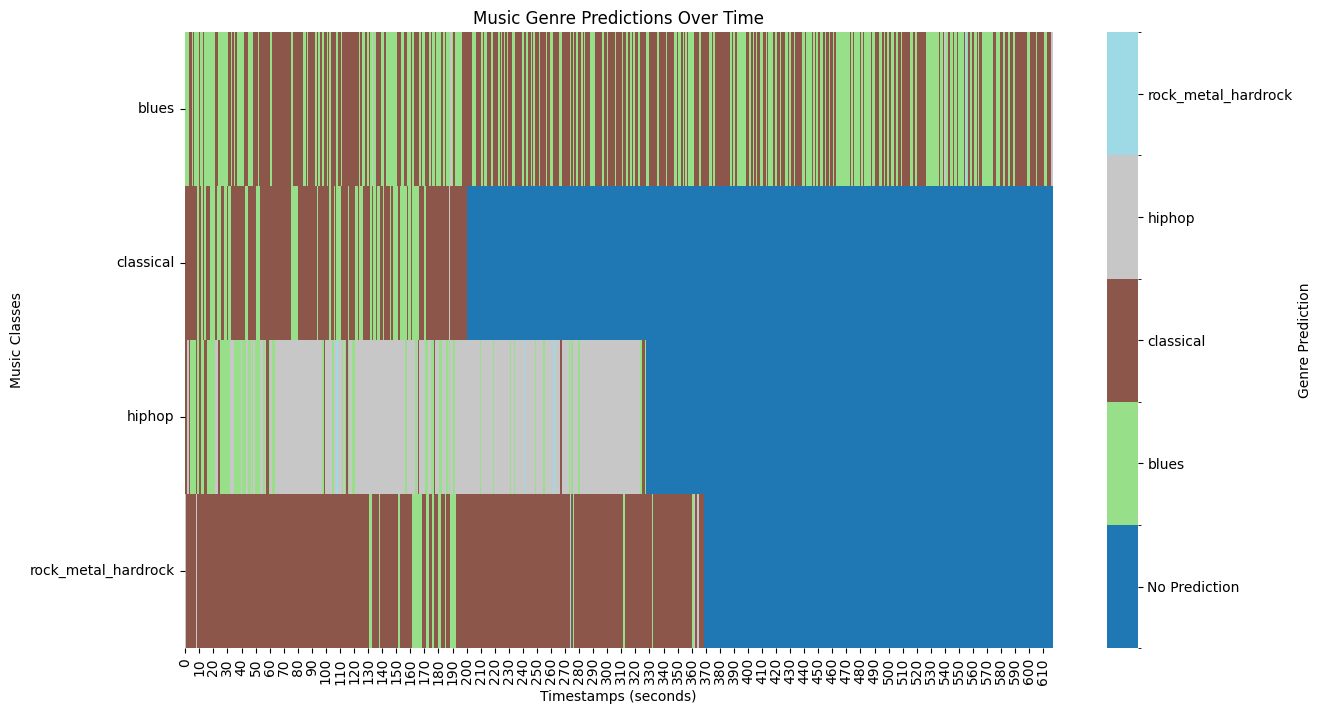

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# padding predictions to have the same length
max_samples = max(len(predictions_dict['blues']), len(predictions_dict['classical']), len(predictions_dict['hiphop']), len(predictions_dict['rock_metal_hardrock']))

def pad_predictions(preds, max_samples):
    return preds + [None] * (max_samples - len(preds))

padded_predictions = {
    'blues': pad_predictions(predictions_dict['blues'], max_samples),
    'classical': pad_predictions(predictions_dict['classical'], max_samples),
    'hiphop': pad_predictions(predictions_dict['hiphop'], max_samples),
    'rock_metal_hardrock': pad_predictions(predictions_dict['rock_metal_hardrock'], max_samples)
}

df = pd.DataFrame(padded_predictions)
df = df.fillna(-1) # -1 values is the absence of a prediction (padding)

# Define a custom color map using a smoother palette
colors = plt.cm.tab20(np.linspace(0, 1, len(genres_dict) + 1))
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-1.5, len(genres_dict) + 0.5), cmap.N)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(df.T, cmap=cmap, norm=norm, cbar_kws={'label': 'Genre Prediction'}, annot=False)

# Setting up the labels and title
plt.ylabel('Music Classes')
plt.xlabel('Timestamps (seconds)')
plt.title('Music Genre Predictions Over Time')

# Customizing the y-ticks to show music genres
plt.yticks(np.arange(len(genres_dict)) + 0.5, list(genres_dict.values()), rotation=0)

# Creating a custom color bar with genre labels
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks(np.arange(-1, len(genres_dict)))
colorbar.set_ticklabels(['No Prediction'] + list(genres_dict.values()))

plt.show()

### Hiphop
Interestingly enough, Eminem's Lose Yourself track opens up with a melody, therefore correctly classifying it as 'classical'. At the 30 seconds mark, approx, a guitar riff is played which ressembles that of a blues riff (personal opinion). After the first minute, approx, the actual beat of the track kicks in, classifying it correctly as hip hop. The 'classical' predictions is due to the fact that during the whole track, melodies of classical music (piano instrument) can be heard.\

### Blues
While correctly the model disregards the hiphop genre, the complete absence of rock_metal_hardrock is not tha pleasant, even if the track does not ressemble such. The classical misclassification might be due to the heavy presence of piano on the background and the consistent low decibels of the track. The periodic presence of blues classification is a good sign that model can identify these signals. Unfortunately, if we were to label this track as one genre, we would have to misclassify it as a 'classical' song, which is incorrect.
(**Edit**: Some times a model is created which classifies blues over classical for this specific track. This behavior doesn't reflect well the accuracy and f1 score of the test dataset)

### Classical
I can't say much about this, since the model corectly classifies the whole track as 'classical'.

### Rock-Metal-HardRock
This is where things go completely wrong and the model shows the incapability of classifying such a genre.

### Overall, more data would provide way better results in my opinion, since CNNs weaknesses and strengths come from having large data to capture complex patters